In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import os
%matplotlib inline 

In [2]:
train_data = pd.read_csv('C:/Users/JOVIALN/Desktop/2022A8017729006_JOVIAL_NIYOGISUBIZO/2022A8017729006_JOVIAL_NIYOGISUBIZO/train.csv',header = None)

In [3]:
test_data = pd.read_csv('C:/Users/JOVIALN/Desktop/2022A8017729006_JOVIAL_NIYOGISUBIZO/2022A8017729006_JOVIAL_NIYOGISUBIZO/test.csv', header = None) 

In [4]:
train_target = train_data[205].value_counts()

In [5]:
train_target

0    51393
3    14369
2    11406
1     2832
Name: 205, dtype: int64

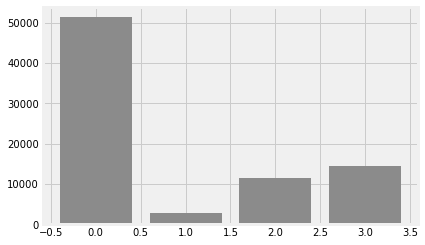

In [6]:
plt.bar(train_target.index,train_target.values, color = sb.color_palette()[4]);

In [7]:
np.random.seed(42)
sample = np.random.choice(train_data.shape[0], 80000, replace = False)
subset = train_data.loc[sample]

In [8]:
subset

,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,200,201,202,203,204,205
47044,1.000000,0.992223,0.787271,0.532304,0.318822,0.175087,0.202308,0.248744,0.215729,0.209034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
44295,1.000000,0.909560,0.571542,0.289507,0.138414,0.092170,0.039528,0.024832,0.039528,0.049244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
74783,0.960221,0.923617,0.880140,0.827543,0.754126,0.658124,0.555029,0.465984,0.389532,0.354443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
70975,0.955700,0.592401,0.638131,0.657677,0.686273,0.721421,0.742600,0.689745,0.587404,0.422302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
46645,1.000000,0.963278,0.195981,0.141661,0.078003,0.015186,0.011405,0.056143,0.056143,0.117238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1.000000,0.906603,0.653642,0.448033,0.386770,0.419338,0.386770,0.373534,0.363527,0.363527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
54886,1.000000,0.947533,0.768994,0.608327,0.367143,0.145511,0.037777,0.034906,0.049204,0.113211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
76820,0.923440,0.877664,0.830389,0.792195,0.727889,0.645665,0.538997,0.394789,0.283554,0.214471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
860,1.000000,0.848745,0.267515,0.000000,0.246864,0.256288,0.246864,0.246864,0.244972,0.250641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [9]:
percentages = [count / subset.shape[0] * 100 for count in subset[205].value_counts()]
percentages[0]

64.24125000000001

In [10]:
for i in np.arange(len(percentages)):
    print(f'the precent of {int(train_target.index[i])} is : {np.round(percentages[i], 2) } %')

the precent of 0 is : 64.24 %
the precent of 3 is : 17.96 %
the precent of 2 is : 14.26 %
the precent of 1 is : 3.54 %


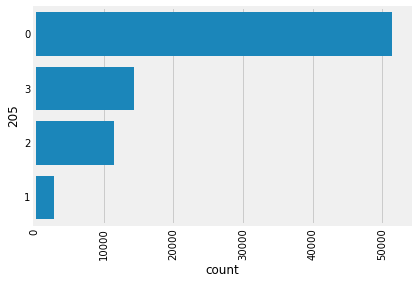

In [11]:
base_color = sb.color_palette()[0]
type_orderion = subset[205].value_counts().index
sb.countplot(data = subset, y = 205, color = base_color, order = type_orderion );
plt.xticks(rotation = 90);

### It looks that the normal cases with zero label posses the most of the dataset with 64.24 %
### hence we will make a balancing as each vector will posses an equal distribution for efficiency 👌 and make 
###    it More convenient 🙂 😎

In [12]:
from sklearn.utils import resample
target1=train_data[train_data[205]==1]
target2=train_data[train_data[205]==2]
target3=train_data[train_data[205]==3]
target0=(train_data[train_data[205]==0]).sample(n=20000,random_state=42)

target1_sample=resample(target1,replace=True,n_samples=20000,random_state=0)
target2_sample=resample(target2,replace=True,n_samples=20000,random_state=0)
target3_sample=resample(target3,replace=True,n_samples=20000,random_state=0)

train_data=pd.concat([target0,target1_sample,target2_sample,target3_sample])


In [13]:
train_target = train_data[205].value_counts()

In [15]:
train_target

0    20000
1    20000
2    20000
3    20000
Name: 205, dtype: int64

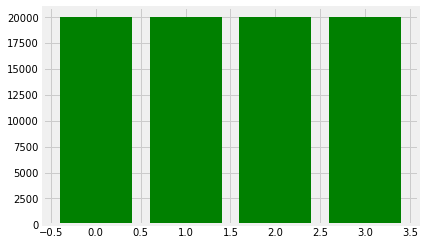

In [16]:
plt.bar(train_target.index,train_target.values, color = 'green');

<B style = "color : blueviolet">Pie Chart<B>

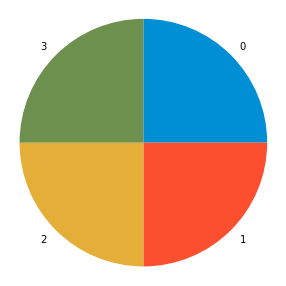

In [17]:
sorted_counts = train_data[205].value_counts();
plt.figure(figsize = [12,5.01])
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');

Now the dataset has been sampled with an equal distribution per each vector feature 

## Let's figure out the test dataset 

In [18]:
test_target = test_data[205].value_counts()

In [19]:
test_target

0    12934
3     3543
2     2793
1      730
Name: 205, dtype: int64

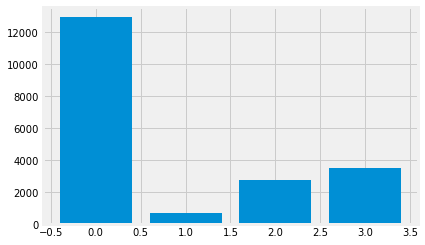

In [20]:
plt.bar(test_target.index,test_target.values, color = sb.color_palette()[0]);

In [21]:
np.random.seed(123)
sample2 = np.random.choice(test_data.shape[0], 200, replace = False)
subset2 = test_data.loc[sample2]

In [22]:
percentages = [count / subset2.shape[0] * 100 for count in subset2[205].value_counts()]
percentages[0]

62.0

In [23]:
for i in np.arange(len(percentages)):
    print(f'the precent of {int(test_data.index[i])} is : {np.round(percentages[i], 2) } %')

the precent of 0 is : 62.0 %
the precent of 1 is : 21.5 %
the precent of 2 is : 15.0 %
the precent of 3 is : 1.5 %


### I notice that 🕵🏽‍♂️ the normal cases posses the data with 62.0 % of the whole cases  
### let's try to resample it ⏳ 📏

In [24]:
from sklearn.utils import resample
target1=test_data[test_data[205]==1]
target2=test_data[test_data[205]==2]
target3=test_data[test_data[205]==3]
target0=(test_data[test_data[205]==0]).sample(n=2000,random_state=0)

target1_sample=resample(target1,replace=True,n_samples=2000,random_state=0)
target2_sample=resample(target2,replace=True,n_samples=2000,random_state=0)
target3_sample=resample(target3,replace=True,n_samples=2000,random_state=0)

test_data=pd.concat([target0,target1_sample,target2_sample,target3_sample])


In [25]:
test_target = test_data[205].value_counts()

In [26]:
test_target

0    2000
1    2000
2    2000
3    2000
Name: 205, dtype: int64

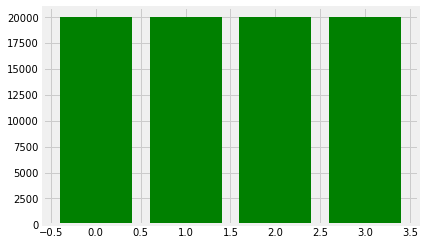

In [27]:
plt.bar(train_target.index,train_target.values, color = 'green');

<B style = "color : blueviolet">Pie Chart<B>

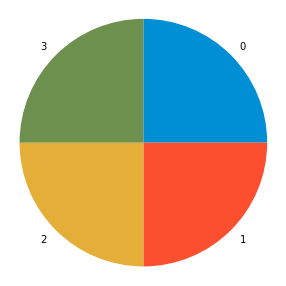

In [28]:
sorted_counts = train_data[205].value_counts();
plt.figure(figsize = [12,5.01])
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');

## Pearson Correlation Coefficient & P-value

In [29]:
from scipy import stats

In [30]:
pearson_coef, p_value = stats.pearsonr(train_data[1], train_data[205])

In [31]:
l = [('1', 1),('2',2),('3',3)]

In [32]:
if max(l):
    print(l)

[('1', 1), ('2', 2), ('3', 3)]


In [33]:
max(l)

('3', 3)

now let's see if an feature impose the target vector

###Here we can use pearson correlation coffecent and P-value 

In [34]:
effictive_list = []
for i in train_data.columns:
    if i != 205:
        pearson_coef, p_value = stats.pearsonr(train_data[i], train_data[205])
        effictive_list.append((f'column number : {i}', f'Pearson Correlation {pearson_coef}', f'P-value : {p_value}'))
    else: break

In [35]:
print('*' * 75)
print(max(effictive_list))
print('*' * 75)

***************************************************************************
('column number : 99', 'Pearson Correlation 0.29784405686433113', 'P-value : 0.0')
***************************************************************************


it seems that the column 99 has the best Pearson Correlation close to 0.5 and P-value = 0 (perfect p-value)
however in our database with signals it's not very effect to get the correlations.<br>
but it also give us an the second which will be Important second in measurement the heart signals,<br>
in the dataset <b style = "color : red; font-size : 15.6">the second  99 </b> is the impartant second

### Adding noise 

the data in the real life monitor ❤️ must have noise even it's will occure in small probability
here we try to adding noise to the original data <br>
using <b style = "color : blue; font-size : 30.6"> Gaussian noise </b>

Text(0, 0.5, 'Time in seconds')

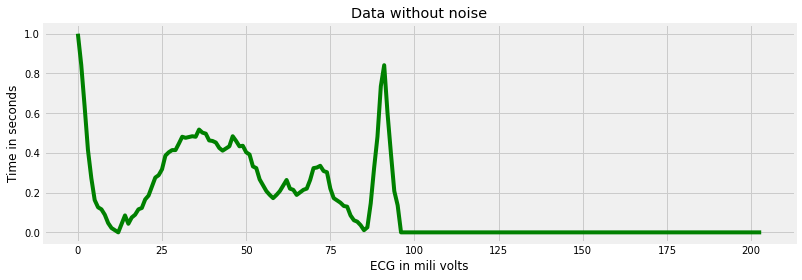

In [36]:
def add_guassian_noise(signal):
    noise = np.random.normal(0,0.05,204)
    return(signal + noise)
noise_data = add_guassian_noise(train_data.iloc[0,:204])
plt.figure(figsize = [12,4.02])
plt.plot(train_data.iloc[0,:204], color = 'green')
plt.title('Data without noise')
plt.xlabel('ECG in mili volts')
plt.ylabel('Time in seconds')

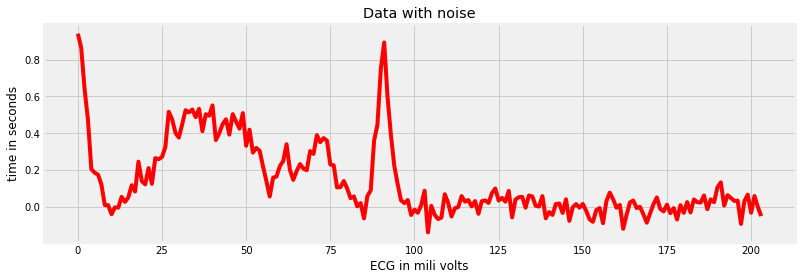

In [37]:
plt.figure(figsize = [12,4.02])
plt.plot(noise_data, color = 'red')
plt.title('Data with noise')
plt.xlabel('ECG in mili volts')
plt.ylabel('time in seconds')
plt.show()

#### as we notice 🔍 the data in the monitor will be like this

the data taken by second we need know the data at the minute hence to display the important second with minute

In [38]:
len(train_data.columns)/60

3.433333333333333

<h4>nearly 3 steps per time ⏱ </h4>

In [39]:
df = train_data.copy()

In [40]:
counter = 0
while counter <= len(df.columns):
    if counter != 204:
        df[counter] = df[counter] + df[counter + 1] + df[counter + 2] 
        counter += 3
    else: break


In [41]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,200,201,202,203,204,205
28835,2.478851,0.843515,0.635336,0.849471,0.272766,0.162583,0.330936,0.116040,0.088755,0.079581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
36892,1.983851,0.611365,0.416940,0.519544,0.168656,0.106371,0.204343,0.081404,0.055998,0.187961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
42165,1.904823,0.621889,0.282934,0.367337,0.115477,0.000000,0.503329,0.173483,0.285128,1.024120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
26775,2.027407,0.758867,0.268541,0.516478,0.207738,0.072621,0.430443,0.129204,0.252421,1.127977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
47837,2.310946,0.861902,0.449044,0.446218,0.228932,0.217286,0.480387,0.166712,0.156076,0.497776,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


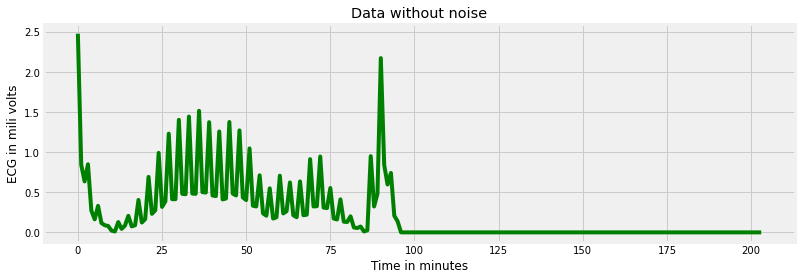

In [42]:
plt.figure(figsize = [12,4.02])
plt.plot(df.iloc[0,:204], color = 'green')
plt.title('Data without noise');
plt.ylabel('ECG in mili volts');
plt.xlabel('Time in minutes');

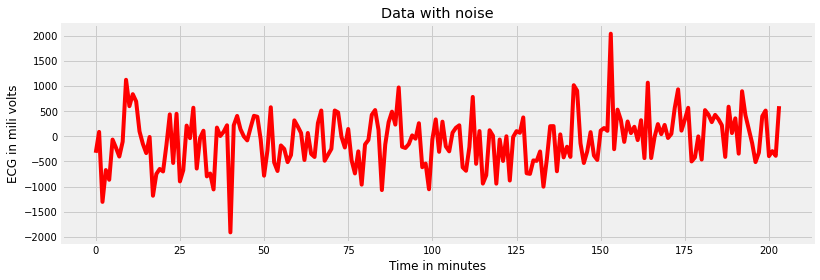

In [43]:
def add_guassian_noise2(signal):
    noise = np.random.normal(0,500,204)
    return(signal + noise)
plt.figure(figsize = [12,4.02])
plt.plot(add_guassian_noise2(df.iloc[0,:204]), color = 'red')
plt.title('Data with noise')
plt.ylabel('ECG in mili volts')
plt.xlabel('Time in minutes')
plt.show()

In [44]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,200,201,202,203,204,205
28835,2.478851,0.843515,0.635336,0.849471,0.272766,0.162583,0.330936,0.116040,0.088755,0.079581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
36892,1.983851,0.611365,0.416940,0.519544,0.168656,0.106371,0.204343,0.081404,0.055998,0.187961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
42165,1.904823,0.621889,0.282934,0.367337,0.115477,0.000000,0.503329,0.173483,0.285128,1.024120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
26775,2.027407,0.758867,0.268541,0.516478,0.207738,0.072621,0.430443,0.129204,0.252421,1.127977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
47837,2.310946,0.861902,0.449044,0.446218,0.228932,0.217286,0.480387,0.166712,0.156076,0.497776,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## The Fourier Transform

Fourier analysis is a field that studies how a mathematical function can be decomposed into a series of simpler trigonometric functions.

display sine wave : 

In [45]:
x = train_data.iloc[0,:].values

In [46]:
from numpy.fft import fft, ifft

In [47]:
x = train_data.iloc[0,:]
X = fft(x)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


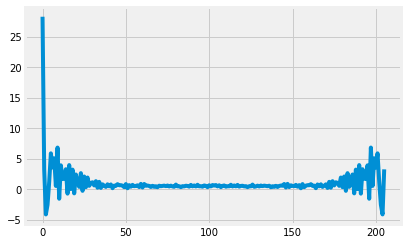

In [48]:
plt.plot(X)

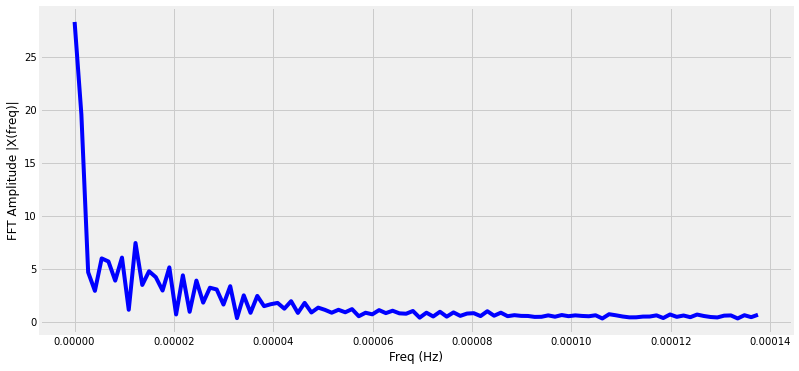

In [49]:
X = fft(train_data.iloc[0,:204])
N = len(X)
n = np.arange(N)
# get the sampling rate
sr = 1 / (60*60)
T = N/sr
freq = n/T 

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

In [50]:
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

C:\Users\JOVIALN\AppData\Local\Temp\ipykernel_3140\1891753606.py:1: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b', \


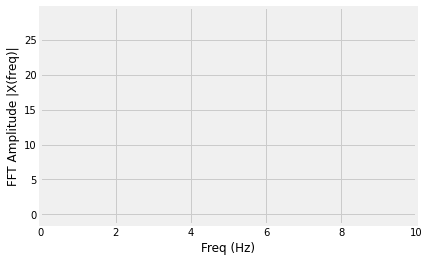

In [51]:
plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10);

### Get the ifft

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


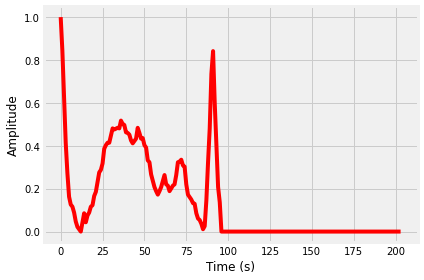

In [52]:
plt.plot(ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

### convert frequency to hour

C:\Users\JOVIALN\AppData\Local\Temp\ipykernel_3140\2023998756.py:1: RuntimeWarning: divide by zero encountered in true_divide
  t_h = 1/f_oneside / (60 * 60)


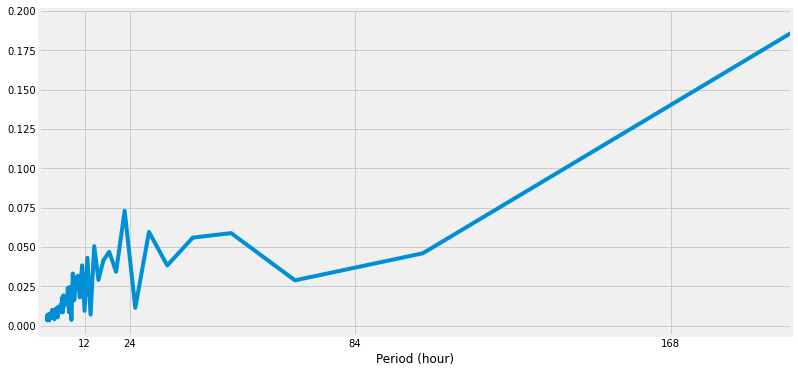

In [53]:
t_h = 1/f_oneside / (60 * 60)

plt.figure(figsize=(12,6))
plt.plot(t_h, np.abs(X[:n_oneside])/n_oneside)
plt.xticks([12, 24, 84, 168])
plt.xlim(0, 200)
plt.xlabel('Period (hour)')
plt.show()

as we see the doctor along with classifier model  can <b style = "color : red">notice and diagnose</b> type of the case from transforming the ploting using Fourier transform by <b style = "color : blue">fft</b> function and <b style = "color : blue">ifft </b> function and we noticed that  also the data will be changed at position <b style = "color : red">99</b>

## preprocessing step

<b> <u>1. set X and y variables </u></b>

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train = train_data.drop(205, axis=1)
y_train = train_data[205]

In [56]:
X_test = test_data.drop(205, axis=1)
y_test = test_data[205]

In [57]:
X_train = X_train.values
y_train = y_train.values

In [58]:
X_test = X_test.values
y_test = y_test.values

In [59]:
unique, counts = np.unique(y_train, return_counts=True)

pd.DataFrame(np.asarray((unique, counts)).T)

,0,1
0,0,20000
1,1,20000
2,2,20000
3,3,20000


cheack that all is right

In [60]:
val = X_train[0][1]

In [61]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [62]:
norm = Normalizer()
std = StandardScaler()

In [63]:
val1 = norm.fit_transform([[val]])
val2 = std.fit_transform([[val]])

<b> <u>2. building the model </u></b>

In [65]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [65]:
models = {
    "LR": LogisticRegression(solver='liblinear'),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC()

}

In [66]:
type(X_train)

numpy.ndarray

In [70]:
!pip install scikit-learn  -U

Defaulting to user installation because normal site-packages is not writeable
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\JOVIALN\\AppData\\Roaming\\Python\\Python39\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Check the permissions.



In [71]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))    
    print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))     
    
    
    print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro' )        )
    
    
    
    print(f"Testing F-Beta:", fbeta_score(y_test, y_pred, beta=0.5, pos_label='positive', average='micro'))
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.7965375
Testing Accuracy: 0.793
Testing Confusion Matrix: 
[[1433  234  279   54]
 [ 413 1393  176   18]
 [ 181   79 1680   60]
 [  72    6   84 1838]]
Recall Score :  0.793
Precision Score :  0.793
Testing F-1: 0.793
Testing F-Beta: 0.793
------------------------------
Training Model KNN 
--------------


C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  labels = [pos_label]
C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  labels = [pos_label]
C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  labels = [pos_label]
C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: Us

Training Accuracy: 0.98745
Testing Accuracy: 0.96575
Testing Confusion Matrix: 
[[1878   78   38    6]
 [  71 1885   34   10]
 [  14   10 1973    3]
 [   5    2    3 1990]]
Recall Score :  0.96575
Precision Score :  0.96575
Testing F-1: 0.96575
Testing F-Beta: 0.9657499999999999
------------------------------
Training Model DT 
--------------


C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  labels = [pos_label]
C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  labels = [pos_label]
C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  labels = [pos_label]
C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: Us

Training Accuracy: 1.0
Testing Accuracy: 0.91325
Testing Confusion Matrix: 
[[1890   50   38   22]
 [ 347 1585   50   18]
 [  93   15 1871   21]
 [  29    1   10 1960]]
Recall Score :  0.91325
Precision Score :  0.91325
Testing F-1: 0.91325
Testing F-Beta: 0.9132500000000001
------------------------------
Training Model RF 
--------------


C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  labels = [pos_label]
C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  labels = [pos_label]
C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  labels = [pos_label]
C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: Us

Training Accuracy: 0.9999875
Testing Accuracy: 0.95125
Testing Confusion Matrix: 
[[1984   10    5    1]
 [ 272 1697   28    3]
 [  47    0 1946    7]
 [  16    0    1 1983]]
Recall Score :  0.95125
Precision Score :  0.95125
Testing F-1: 0.95125
Testing F-Beta: 0.95125
------------------------------
Training Model XGB 
--------------


C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  labels = [pos_label]
C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  labels = [pos_label]
C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  labels = [pos_label]
C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: Us

Training Accuracy: 0.9996
Testing Accuracy: 0.956875
Testing Confusion Matrix: 
[[1960   22   15    3]
 [ 225 1742   29    4]
 [  32    1 1961    6]
 [   3    4    1 1992]]
Recall Score :  0.956875
Precision Score :  0.956875
Testing F-1: 0.956875
Testing F-Beta: 0.9568749999999999
------------------------------
Training Model Naive Bayes 
--------------


C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  labels = [pos_label]
C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  labels = [pos_label]
C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  labels = [pos_label]
C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: Us

Training Accuracy: 0.3477125
Testing Accuracy: 0.352125
Testing Confusion Matrix: 
[[ 243    4  140 1613]
 [ 102  179  270 1449]
 [ 157    8  399 1436]
 [   1    0    3 1996]]
Recall Score :  0.352125
Precision Score :  0.352125
Testing F-1: 0.352125
Testing F-Beta: 0.352125
------------------------------
Training Model SVC 
--------------


C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  labels = [pos_label]
C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  labels = [pos_label]
C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  labels = [pos_label]
C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: Us

Training Accuracy: 0.9555
Testing Accuracy: 0.944875
Testing Confusion Matrix: 
[[1887   77   26   10]
 [ 236 1740   24    0]
 [  37    7 1955    1]
 [  10    8    5 1977]]
Recall Score :  0.944875
Precision Score :  0.944875
Testing F-1: 0.9448750000000001
Testing F-Beta: 0.944875
------------------------------


C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  labels = [pos_label]
C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  labels = [pos_label]
C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  labels = [pos_label]
C:\Users\JOVIALN\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1386: Us